This notebook generates effect sizes under various probability models including normal, gamma, and exponential distributions. We demonstrate simulating effect sizes both independently and directly on the GRG structure with real genomic variants. The notebook includes multiple examples showing single and multiple causal mutations, visualizes the distributions of simulated effect sizes through histograms, and displays results as pandas DataFrames. Throughout, it compares the theoretical distribution parameters with the empirically simulated values to validate the simulation approach.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pygrgl

from grg_pheno_sim.effect_size import sim_grg_causal_mutation, convert_to_effect_output
from grg_pheno_sim.model import grg_causal_mutation_model
from grg_pheno_sim.split import split_effect_sizes


The following command only serves the purpose of converting the VCF zip file into a GRG that will be used for the phenotype simulation. The bash script below will function as expected given the relative path for the source data file is accurate.

In [2]:
%%script bash --out /dev/null
if [ ! -f test-200-samples.grg ]; then
  grg construct -p 10 ../data/test-200-samples.vcf.gz --out-file test-200-samples.grg
fi

The first sample shows the usage of the normal distribution model for effect sizes simulation. The first half shows the effect sizes being simulated independently and the second half shows the simulation on a sample grg structure.

In [3]:
rng = np.random.default_rng()

mean_1 = 0.0  
var_1 = 1.0  
model_normal = grg_causal_mutation_model("normal", mean=mean_1, var=var_1)

#simulating effect sizes using just the model
num_causal = 1000  #number of causal sites

effect_sizes = model_normal.sim_effect_size(num_causal, rng)

print("Simulated Effect Sizes:", effect_sizes)

Simulated Effect Sizes: [ 1.32334959e+00  5.06747319e-01  1.73325315e+00 -1.05014301e+00
 -3.28316246e-01  2.37846536e-01 -1.69486604e+00 -7.87680433e-01
 -9.02367313e-01 -1.60061069e-01  1.01381327e+00  5.02082008e-01
  1.43561324e+00  3.14593014e-02  4.98066767e-01  1.65962394e+00
 -3.11468362e-01  3.83974600e-02  6.13428024e-02  1.15069856e+00
  4.13400924e-01 -6.39984954e-01  2.38357716e-01  4.11886836e-01
 -7.87316361e-01 -1.18236875e+00 -1.37426824e+00 -1.89336144e-01
 -3.62047285e-01  5.28080045e-01 -1.13671943e+00  6.51742613e-01
  3.40731791e-01  1.29348335e+00 -2.26388707e-01  8.18168016e-01
  4.04044189e-01 -1.14049755e+00 -1.07254136e+00 -2.55948182e-01
 -1.74181572e+00  2.30995391e-01  2.12559100e-01  4.51063906e-01
  1.96081642e+00 -1.62185377e+00 -1.69262974e-02  5.88753360e-01
  3.72780222e-01 -5.41168985e-01  6.82722943e-01  1.95862487e+00
  1.02852455e+00 -1.37070312e+00 -1.04002632e+00  1.49058038e+00
  3.47003550e-01  8.26298566e-02  7.73833940e-01  1.19086967e+00
 

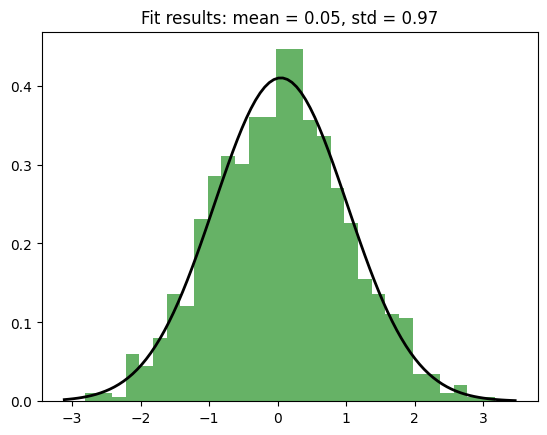

In [4]:
plt.hist(effect_sizes, bins=30, density=True, alpha=0.6, color='g')

mean, std = norm.fit(effect_sizes)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mean = %.2f, std = %.2f" % (mean, std)
plt.title(title)

plt.show()

In [5]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in the sample grg, stored in the same directory

In [6]:

trait_df_normal = sim_grg_causal_mutation(grg_1, num_causal=num_causal, model=model_normal, random_seed=1)

trait_df_normal #this is the pandas data frame showing the results using the normal distribution

,mutation_id,effect_size,causal_mutation_id
0,20,-1.810258,0
1,28,1.151768,0
2,62,1.681257,0
3,76,2.346698,0
4,119,-0.286668,0
...,...,...,...
995,10862,-0.221163,0
996,10874,-1.136983,0
997,10879,-0.966133,0
998,10883,-1.402602,0


If we want mutation data for each mutation with a non-zero effect size, then the following function saves the required data including alternate allele, reference allele, and position in a .par file with the given name in the same directory.

In [7]:
path = "effect_sizes_sample.par"
convert_to_effect_output(trait_df_normal, grg_1, path)

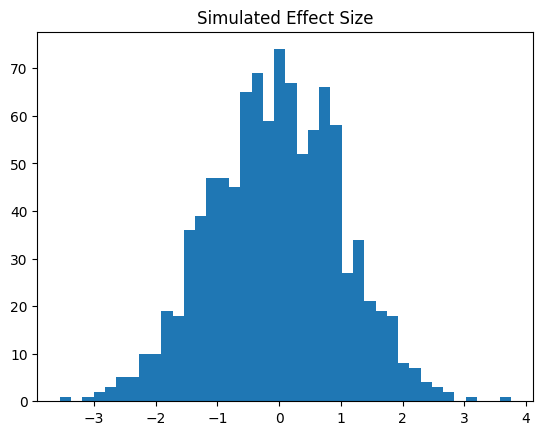

Mean of effect sizes: -0.047957790151623006
Standard deviation of effect sizes: 1.0514636822784187


In [8]:
plt.hist(trait_df_normal["effect_size"], bins=40)
plt.title("Simulated Effect Size")
plt.show()

mean, std = norm.fit(trait_df_normal["effect_size"])
print("Mean of effect sizes: " + str(mean))
print("Standard deviation of effect sizes: " + str(std))


The plots above serve to verify that our model indeed simulates effect sizes following the normal distribution, with the specified mean and standard deviation.

The second sample shows the usage of the exponential distribution model for causal mutation simulation. The first half shows the effect sizes being simulated independently and the second half shows the simulation on a sample grg structure.

In [9]:
rng = np.random.default_rng()

scale_1 = 2.0 #scale for exponential distribution
model_exp = grg_causal_mutation_model("exponential", scale=scale_1)

num_causal = 1000  #number of causal sites

effect_sizes = model_exp.sim_effect_size(num_causal, rng)

print("Simulated Effect Sizes:", effect_sizes)

Simulated Effect Sizes: [2.67008282e+00 4.14499329e+00 1.30278992e-01 3.15070825e+00
 5.05853199e-01 6.00171942e-01 2.52623754e+00 2.65451577e-01
 2.50223473e-01 2.66661139e+00 6.71341537e-01 1.00603752e+00
 3.96677102e+00 2.29158593e+00 2.49715366e-01 9.70947513e-01
 5.32716609e-01 5.87099715e-01 2.70964175e+00 2.47133810e+00
 2.40146459e+00 9.83804704e-01 6.28083102e-02 3.89751730e-01
 2.59475067e+00 2.02629012e-01 1.17247035e+00 3.13950344e-01
 5.23948639e+00 4.47838540e-01 5.97741670e-02 4.78944723e+00
 7.57110733e+00 2.96227258e+00 1.71901998e+00 1.65445094e-01
 5.66950105e+00 1.96761916e+00 5.89394508e-01 2.67649242e+00
 3.76531193e-01 1.68191948e+00 8.29015757e+00 1.76747242e+00
 1.28255604e+00 5.15455881e+00 2.63380715e+00 2.77106002e+00
 5.96939538e+00 7.78282743e-01 4.96454992e-02 4.05561809e+00
 5.39983648e-01 1.39202555e+00 6.66515523e-01 3.56701600e-01
 1.68417970e+00 1.84210149e-01 1.26848752e-01 2.60895655e+00
 6.55803456e+00 2.69295007e+00 1.65625754e+00 3.46623631e-01


Estimated Scale: 2.0381801541736713


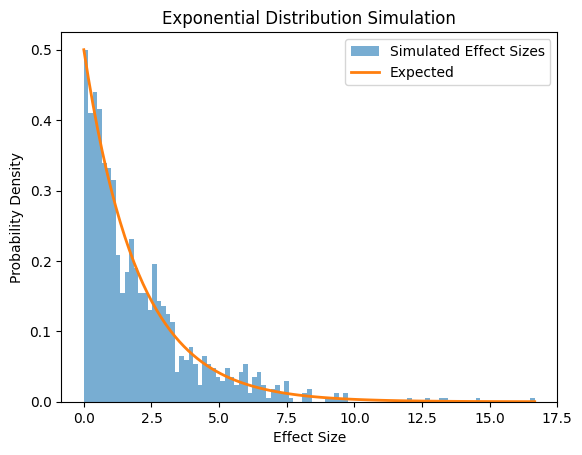

In [10]:
bins = np.linspace(0, max(effect_sizes), 100)
pdf = (1/scale_1) * np.exp(-bins/scale_1)

# plot histogram of  simulated data
plt.hist(effect_sizes, bins=bins, density=True, alpha=0.6, label='Simulated Effect Sizes')

# plot the expected PDF
plt.plot(bins, pdf, label='Expected', linewidth=2)

estimated_scale = np.mean(effect_sizes)
print("Estimated Scale:", estimated_scale)

plt.title('Exponential Distribution Simulation')
plt.xlabel('Effect Size')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [11]:
trait_df_exp = sim_grg_causal_mutation(grg_1, num_causal=num_causal, model=model_exp, random_seed=1)

trait_df_exp #this is the pandas data frame showing the results using the exponential distribution

,mutation_id,effect_size,causal_mutation_id
0,20,2.378089,0
1,28,2.494014,0
2,62,2.475986,0
3,76,1.182089,0
4,119,3.078491,0
...,...,...,...
995,10862,2.974267,0
996,10874,0.305761,0
997,10879,0.136204,0
998,10883,3.532695,0


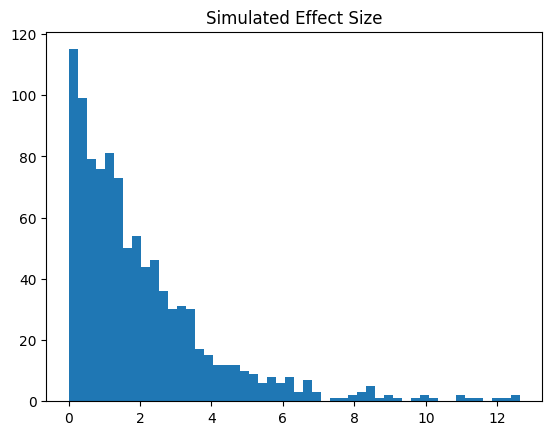

In [12]:
plt.hist(trait_df_exp["effect_size"], bins=50)
plt.title("Simulated Effect Size")
plt.show()

The plots above serve to verify that our model indeed simulates effect sizes following the exponential distribution, with the specified scale.

The third sample shows the usage of the fixed distribution model for causal mutation simulation. The first half shows the effect sizes being simulated independently and the second half shows the simulation on a sample grg structure.

In [13]:
rng = np.random.default_rng()

val_1 = 1.0 #value for fixed model
model_fixed = grg_causal_mutation_model("fixed", value=val_1) #for fixed value of 1
model_fixed_inv = grg_causal_mutation_model("fixed", value=val_1, random_sign=True) #for random assignments of signs for inverse values for the effect sizes

num_causal = 1000  #number of causal sites

effect_sizes = model_fixed.sim_effect_size(num_causal, rng)
effect_sizes_inv = model_fixed_inv.sim_effect_size(num_causal, rng)

print("Simulated Effect Sizes:", effect_sizes)
print("Simulated Effect Sizes with randomized inverses:", effect_sizes_inv)

Simulated Effect Sizes: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [14]:
trait_df_fixed = sim_grg_causal_mutation(grg_1, num_causal=num_causal, model=model_fixed, random_seed=1)

trait_df_fixed #this is the pandas data frame showing the results using the fixed model

,mutation_id,effect_size,causal_mutation_id
0,20,1.0,0
1,28,1.0,0
2,62,1.0,0
3,76,1.0,0
4,119,1.0,0
...,...,...,...
995,10862,1.0,0
996,10874,1.0,0
997,10879,1.0,0
998,10883,1.0,0


In [15]:
trait_df_fixed_inv = sim_grg_causal_mutation(grg_1, num_causal=num_causal, model=model_fixed_inv, random_seed=1)

trait_df_fixed_inv #this is the pandas data frame showing the results using the fixed model with randomized signs

,mutation_id,effect_size,causal_mutation_id
0,20,1.0,0
1,28,-1.0,0
2,62,1.0,0
3,76,-1.0,0
4,119,-1.0,0
...,...,...,...
995,10862,1.0,0
996,10874,-1.0,0
997,10879,-1.0,0
998,10883,1.0,0


The remainder of sample use cases for the distributions supported are given in the function definition for `grg_model` in the file `effect_size.py`. This also includes modifications to distributions (for example, allowing negative signs for exponential and gamma distributions). However, we provide a sample use case for the multivariate normal distribution below. We first provide a sample where we have two causal mutations and then three causal mutations.

In [17]:
rng = np.random.default_rng()

mean_multi = np.array([1,5]) #vector with 1 and 5 to show means of 1 and 5 for the two distributions
cov_multi = np.eye(2) #identity 2D matrix for the covariance matrix
model_multi_normal_two = grg_causal_mutation_model("multivariate normal", mean=mean_multi, cov=cov_multi)

#simulating effect sizes using just the model
num_causal = 1000  #number of causal sites

effect_sizes = model_multi_normal_two.sim_effect_size(num_causal, rng)

print("Simulated Effect Sizes:", effect_sizes)

Simulated Effect Sizes: [[ 2.36343443  4.79080908]
 [ 2.19034891  3.2804602 ]
 [-1.65209343  4.35290161]
 ...
 [ 0.59527524  5.28446197]
 [ 0.95755361  5.2628739 ]
 [ 2.18506041  5.3417805 ]]


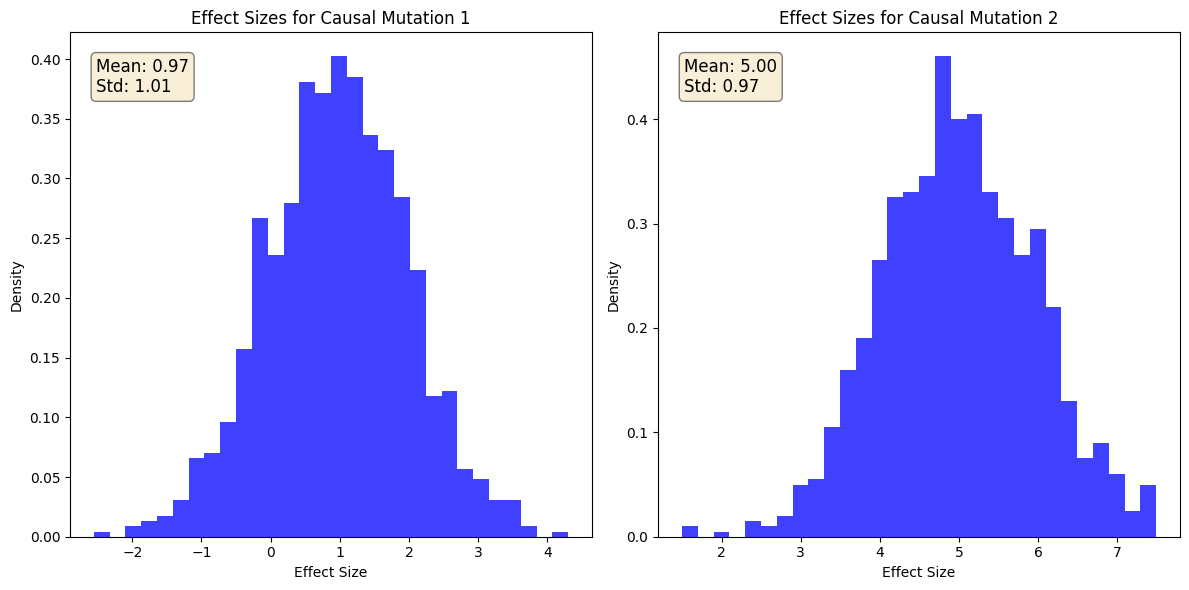

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes = axes.flatten()

for i in range(effect_sizes.shape[1]):
        ax = axes[i]
        data = effect_sizes[:, i]
        mean = np.mean(data)
        std = np.std(data)

        ax.hist(data, bins=30, alpha=0.75, color='blue', density=True)
        ax.set_title(f'Effect Sizes for Causal Mutation {i+1}')
        ax.set_xlabel('Effect Size')
        ax.set_ylabel('Density')

        textstr = f'Mean: {mean:.2f}\nStd: {std:.2f}'
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()


In [19]:
trait_df_multi_normal_two = sim_grg_causal_mutation(grg_1, num_causal=num_causal, model=model_multi_normal_two, random_seed=1)

trait_df_multi_normal_two
#this is the pandas data frame showing the results using the multivariate normal distribution for two traits

,mutation_id,effect_size,causal_mutation_id
0,20,2.017136,0
1,20,2.825391,1
2,28,0.244580,0
3,28,6.053215,1
4,62,1.195407,0
...,...,...,...
1995,10879,4.642862,1
1996,10883,0.589825,0
1997,10883,4.249715,1
1998,10889,0.696847,0


If we want the effect sizes information to be displayed for each mutation along with other mutation data, the function below must be used.

In [20]:
path = "effect_sizes_multi_sample.par"
convert_to_effect_output(trait_df_multi_normal_two, grg_1, path)

In [21]:
split_effect_sizes(trait_df_multi_normal_two, return_print=True) #prints the dataframes

      mutation_id  effect_size  causal_mutation_id
0              20     2.017136                   0
2              28     0.244580                   0
4              62     1.195407                   0
6              76     0.073138                   0
8             119     1.221041                   0
...           ...          ...                 ...
1990        10862     0.511696                   0
1992        10874    -0.924656                   0
1994        10879    -2.080178                   0
1996        10883     0.589825                   0
1998        10889     0.696847                   0

[1000 rows x 3 columns]
      mutation_id  effect_size  causal_mutation_id
1              20     2.825391                   1
3              28     6.053215                   1
5              62     6.911546                   1
7              76     5.944921                   1
9             119     4.031804                   1
...           ...          ...                 ...
1991  

In [22]:
split_df = split_effect_sizes(trait_df_multi_normal_two, return_list=True) #returns list with split dataframes instead of directly printing

split_df[0] #the first split dataframe

,mutation_id,effect_size,causal_mutation_id
0,20,2.017136,0
2,28,0.244580,0
4,62,1.195407,0
6,76,0.073138,0
8,119,1.221041,0
...,...,...,...
1990,10862,0.511696,0
1992,10874,-0.924656,0
1994,10879,-2.080178,0
1996,10883,0.589825,0


In [23]:
split_df[1] #the second split dataframe

,mutation_id,effect_size,causal_mutation_id
1,20,2.825391,1
3,28,6.053215,1
5,62,6.911546,1
7,76,5.944921,1
9,119,4.031804,1
...,...,...,...
1991,10862,3.138018,1
1993,10874,3.884761,1
1995,10879,4.642862,1
1997,10883,4.249715,1


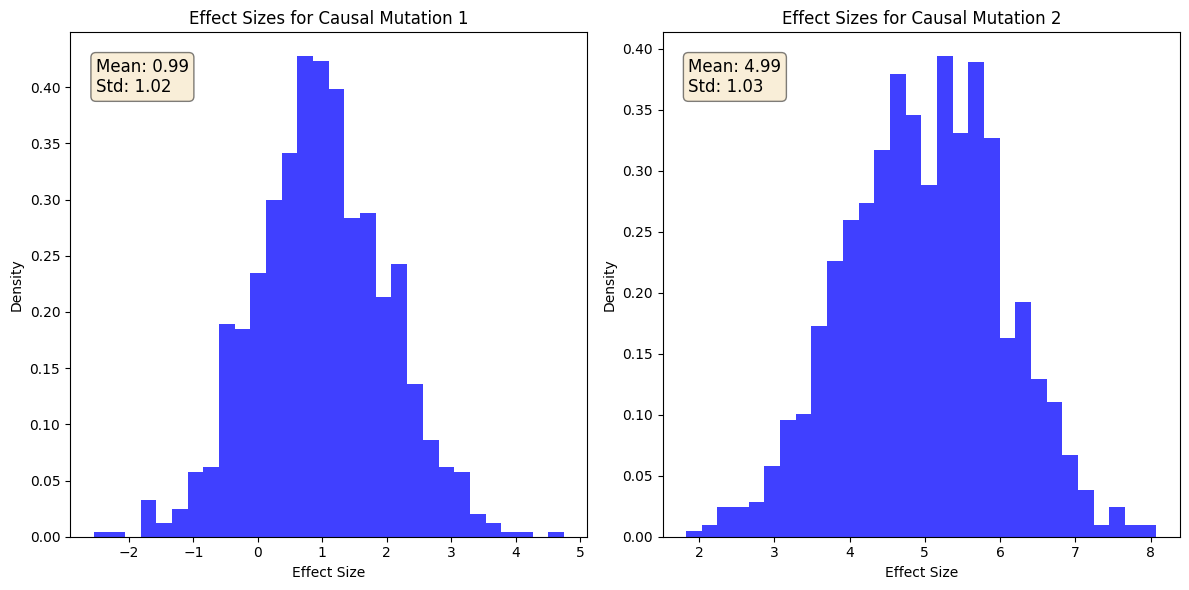

In [24]:

num_traits = trait_df_multi_normal_two['causal_mutation_id'].nunique()
fig, axes = plt.subplots(nrows=1, ncols=num_traits, figsize=(12, 6))
if num_traits == 1:
      axes = [axes]  

for i, ax in enumerate(axes):
        data = trait_df_multi_normal_two[trait_df_multi_normal_two['causal_mutation_id'] == i]['effect_size']
        mean = data.mean()
        std = data.std()

        ax.hist(data, bins=30, alpha=0.75, color='blue', density=True)
        ax.set_title(f'Effect Sizes for Causal Mutation {i+1}')
        ax.set_xlabel('Effect Size')
        ax.set_ylabel('Density')

        textstr = f'Mean: {mean:.2f}\nStd: {std:.2f}'
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()



The plots and the data frames demonstrate the usage and distribution of the effect sizes for two causal mutations. 

In [25]:
rng = np.random.default_rng()

mean_multi = np.array([1,3,7]) #vector with 1,3, and 7 to show means for the three distributions
cov_multi = np.eye(3) #identity 2D matrix for the covariance matrix
model_multi_normal_three = grg_causal_mutation_model("multivariate normal", mean=mean_multi, cov=cov_multi)

#simulating effect sizes using just the model
num_causal = 1000  #number of causal sites

trait_df_multi_normal_three = sim_grg_causal_mutation(grg_1, num_causal=num_causal, model=model_multi_normal_three, random_seed=1)

trait_df_multi_normal_three
#this is the pandas data frame showing the results using the multivariate normal distribution for three traits

,mutation_id,effect_size,causal_mutation_id
0,20,0.821002,0
1,20,2.369686,1
2,20,6.470724,2
3,28,-0.017333,0
4,28,3.866580,1
...,...,...,...
2995,10883,2.667983,1
2996,10883,7.418547,2
2997,10889,-0.378759,0
2998,10889,2.640463,1


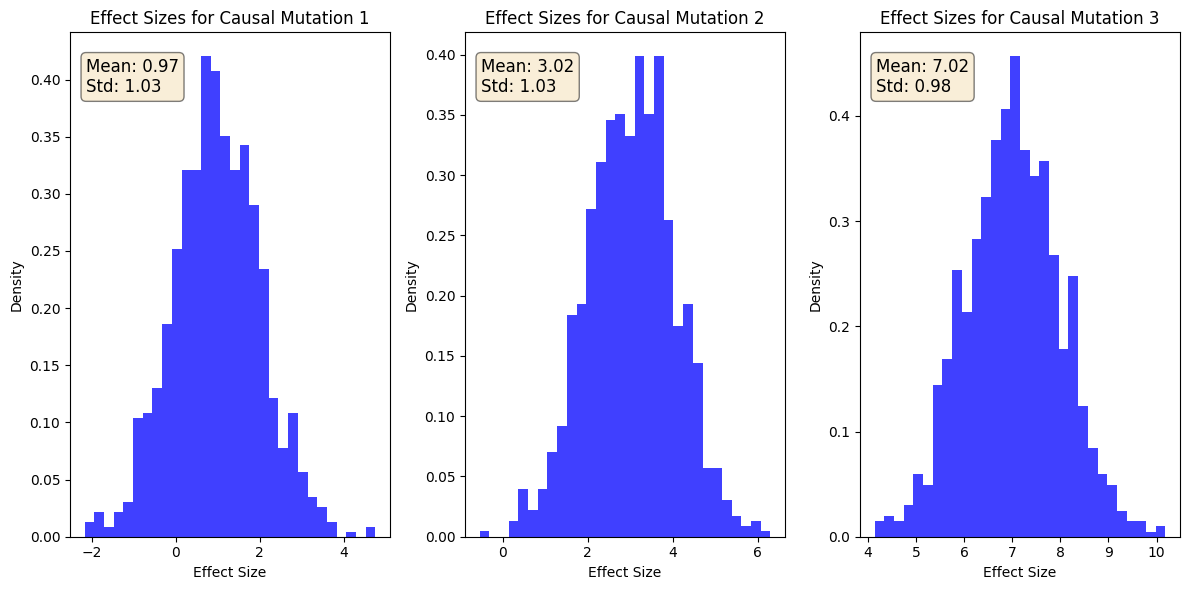

In [26]:
num_traits = trait_df_multi_normal_three['causal_mutation_id'].nunique()
fig, axes = plt.subplots(nrows=1, ncols=num_traits, figsize=(12, 6))
if num_traits == 1:
      axes = [axes]  

for i, ax in enumerate(axes):
        data = trait_df_multi_normal_three[trait_df_multi_normal_three['causal_mutation_id'] == i]['effect_size']
        mean = data.mean()
        std = data.std()

        ax.hist(data, bins=30, alpha=0.75, color='blue', density=True)
        ax.set_title(f'Effect Sizes for Causal Mutation {i+1}')
        ax.set_xlabel('Effect Size')
        ax.set_ylabel('Density')

        textstr = f'Mean: {mean:.2f}\nStd: {std:.2f}'
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

The plots and the data frames demonstrate the usage and distribution of the effect sizes for three causal mutations. 

We also provide a sample use case for the multivariate exponential distribution below (for two causal mutations). 

In [27]:
rng = np.random.default_rng()

scale_multi = [1, 2] #vector with 1 and 2 to show scale for the two exp distributions
model_multi_exp_two = grg_causal_mutation_model("multivariate exponential", scales=scale_multi)

#simulating effect sizes using just the model
num_causal = 1000  #number of causal sites

effect_sizes = model_multi_exp_two.sim_effect_size(num_causal, rng)

print("Simulated Effect Sizes:", effect_sizes)

Simulated Effect Sizes: [[0.17852612 0.31468638]
 [3.09442547 0.22748186]
 [0.37989864 3.46828483]
 ...
 [0.8689425  1.20610263]
 [0.0571836  0.82412088]
 [0.77045624 0.66775951]]


In [28]:
rng = np.random.default_rng()

trait_df_multi_exp_two = sim_grg_causal_mutation(grg_1, num_causal=num_causal, model=model_multi_exp_two, random_seed=1)

trait_df_multi_exp_two

,mutation_id,effect_size,causal_mutation_id
0,20,1.189045,0
1,20,3.533118,1
2,28,1.247007,0
3,28,1.786008,1
4,62,1.237993,0
...,...,...,...
1995,10879,0.891179,1
1996,10883,1.766347,0
1997,10883,0.135702,1
1998,10889,0.945416,0


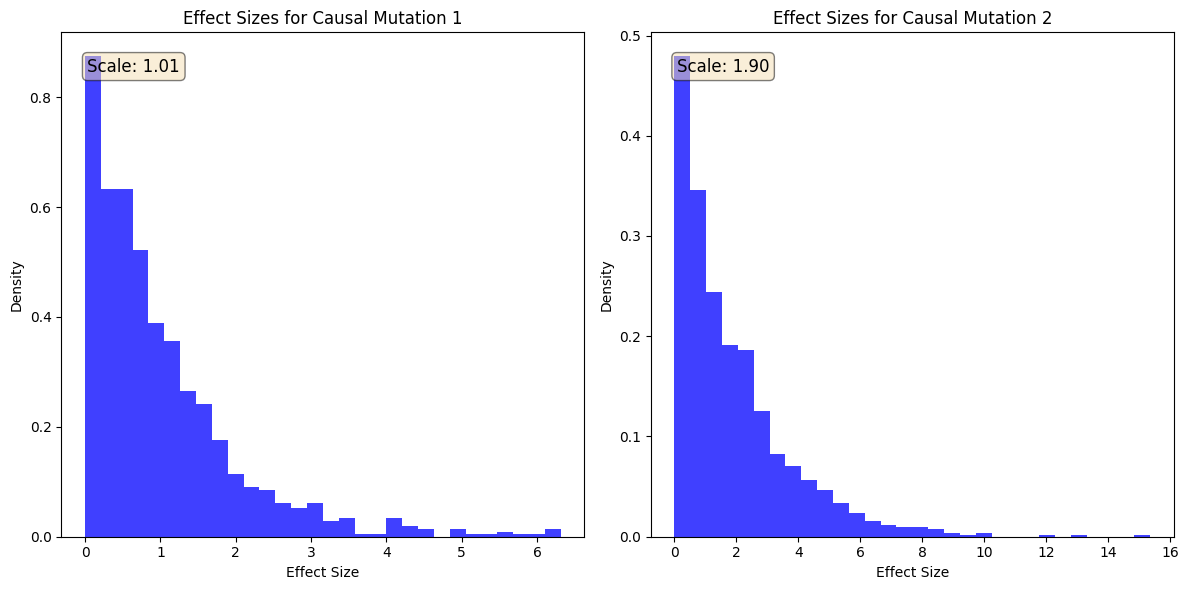

In [29]:
num_traits = trait_df_multi_exp_two['causal_mutation_id'].nunique()
fig, axes = plt.subplots(nrows=1, ncols=num_traits, figsize=(12, 6))
if num_traits == 1:
      axes = [axes]  

for i, ax in enumerate(axes):
        data = trait_df_multi_exp_two[trait_df_multi_exp_two['causal_mutation_id'] == i]['effect_size']
        scale = data.mean()

        ax.hist(data, bins=30, alpha=0.75, color='blue', density=True)
        ax.set_title(f'Effect Sizes for Causal Mutation {i+1}')
        ax.set_xlabel('Effect Size')
        ax.set_ylabel('Density')

        textstr = f'Scale: {scale:.2f}'
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()


The plots and the data frames demonstrate the usage and distribution of the effect sizes for two causal mutations using the exponential distribution. 